In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
root_path = ! pwd
root_path = root_path[0] + '/'
root_path

'/home/ruslan/Desktop/Swarm/Swarmskin/swarmskin_data/'

In [3]:
! ls

1_drone  4_drones  plot2.py  plot.py  postprocessing.ipynb


In [4]:
! ls 1_drone/

tactile  visual  visual_tactile


# One Drone experiment 

### Tactile feedback

In [39]:
def one_drone_land(PATH, cf_name):
    cf  = pd.read_csv(PATH + '_slash_vicon_slash_'+cf_name+'_slash_'+cf_name+'.csv')
    lp1 = pd.read_csv(PATH + '_slash_vicon_slash_lp1_slash_lp1.csv')
    lp2 = pd.read_csv(PATH + '_slash_vicon_slash_lp2_slash_lp2.csv')
    lp3 = pd.read_csv(PATH + '_slash_vicon_slash_lp3_slash_lp3.csv')
    lp4 = pd.read_csv(PATH + '_slash_vicon_slash_lp4_slash_lp4.csv')
    
    plt.figure()
    if 'lp1' in PATH: lp = lp1
    if 'lp2' in PATH: lp = lp2
    if 'lp3' in PATH: lp = lp3
    if 'lp4' in PATH: lp = lp4
    plt.plot(cf.x, cf.y, label='drone')
    plt.plot(lp.x, lp.y, label='lp')
#     plt.plot(cf.x[-1], cf.y[-1], label='landing point')
    plt.plot( cf.x[len(cf.x)-1], cf.y[len(cf.y)-1], 'ro', markersize=10, label='landing point')
    land_point = np.array([cf.x[len(cf.x)-1], cf.y[len(cf.y)-1]])
    lp_last    = np.array([lp.x[len(cf.x)-1], lp.y[len(cf.y)-1]])
    plt.plot(lp_last[0], lp_last[1], '*')
    err = np.linalg.norm(land_point - lp_last)
    plt.legend()
    return err

In [34]:
cf_names = ['cf1', 'cf2', 'cf3', 'cf4']

In [5]:
! ls 1_drone/tactile/

lp1_2019-02-27-15-59-27  lp2_2019-02-28-10-13-56  lp3_2019-03-01-13-19-18
lp1_2019-02-27-16-04-24  lp2_2019-03-01-12-41-02  lp3_2019-03-01-13-21-45
lp1_2019-02-28-10-09-57  lp2_2019-03-01-12-44-04  lp4_2019-02-27-16-01-00
lp1_2019-02-28-10-16-57  lp2_2019-03-01-13-20-28  lp4_2019-02-27-16-03-59
lp1_2019-03-01-12-39-19  lp2_2019-03-01-13-22-43  lp4_2019-02-28-10-11-11
lp1_2019-03-01-12-46-19  lp3_2019-02-27-16-00-07  lp4_2019-02-28-10-16-31
lp1_2019-03-01-13-18-40  lp3_2019-02-27-16-02-06  lp4_2019-03-01-12-42-28
lp1_2019-03-01-13-23-59  lp3_2019-02-28-10-10-23  lp4_2019-03-01-12-44-45
lp2_2019-02-27-16-00-34  lp3_2019-02-28-10-13-05  lp4_2019-03-01-13-21-02
lp2_2019-02-27-16-03-26  lp3_2019-03-01-12-40-08  lp4_2019-03-01-13-23-24
lp2_2019-02-28-10-10-47  lp3_2019-03-01-12-43-13


In [6]:
path = root_path + '1_drone/tactile/'

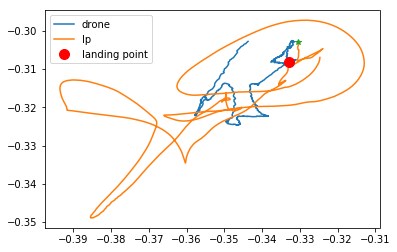

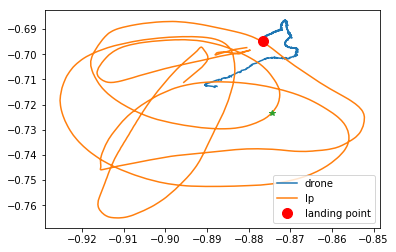

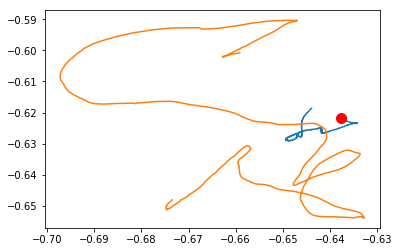

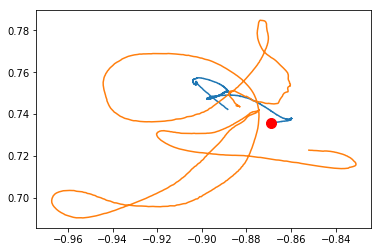

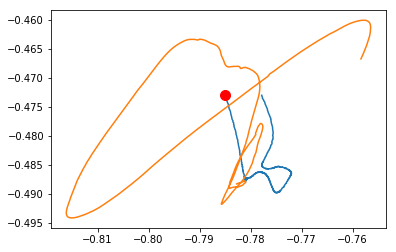

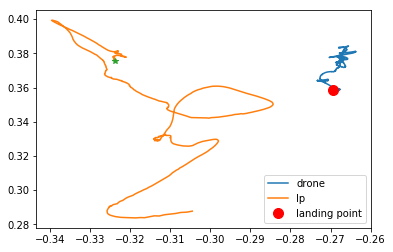

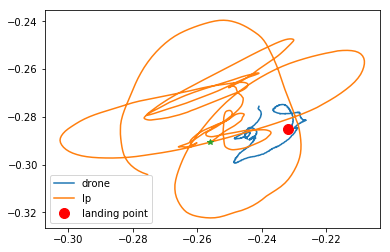

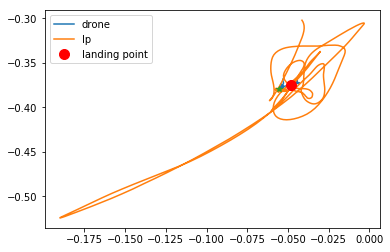

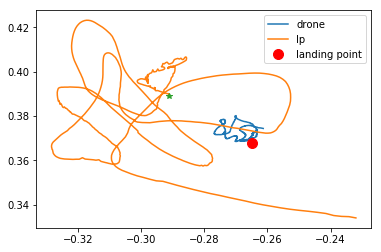

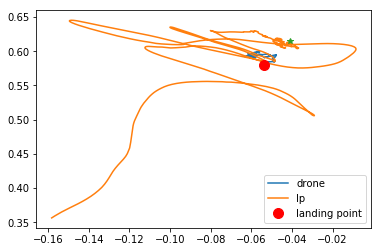

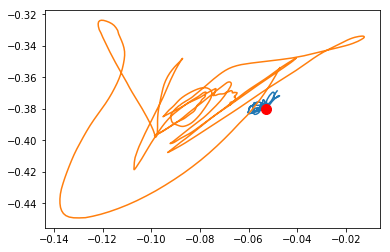

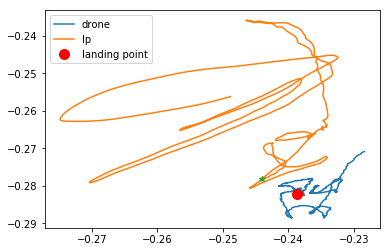

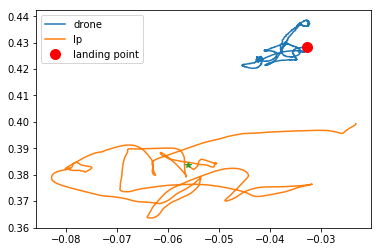

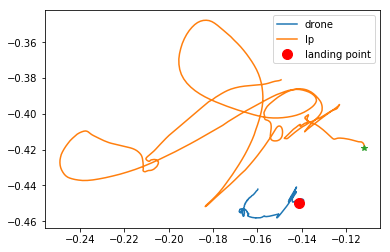

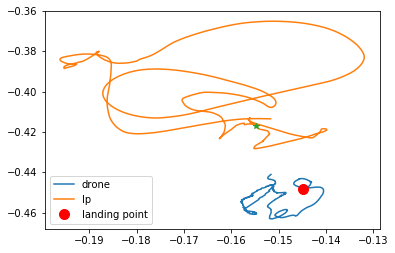

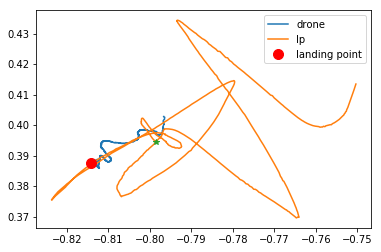

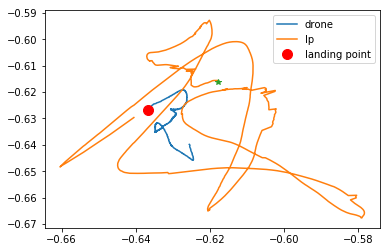

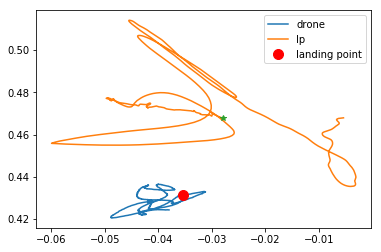

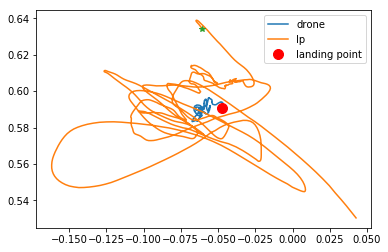

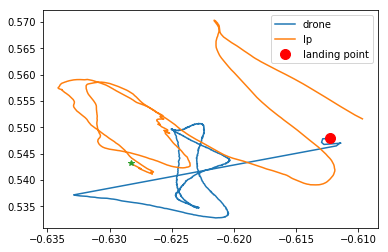

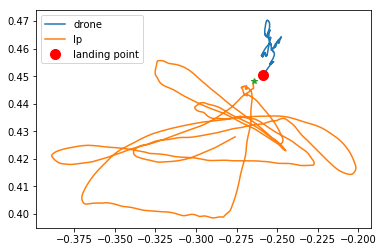

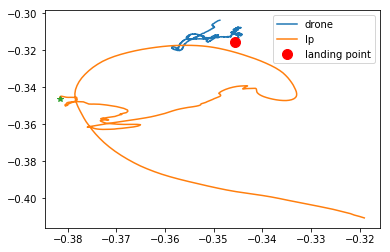

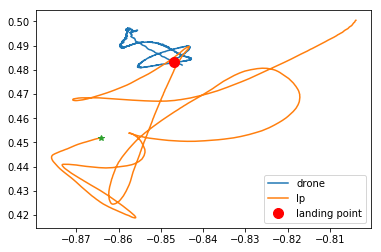

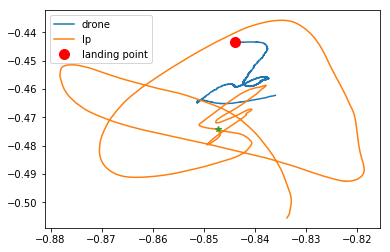

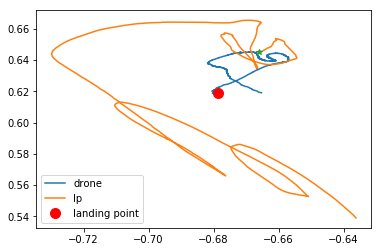

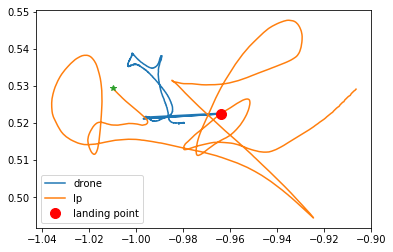

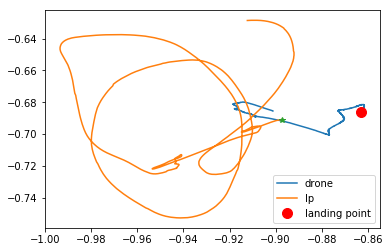

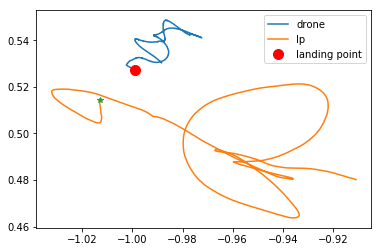

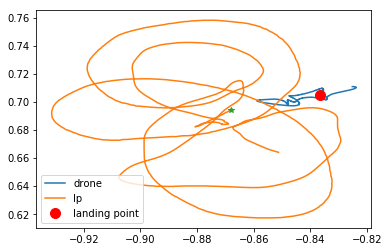

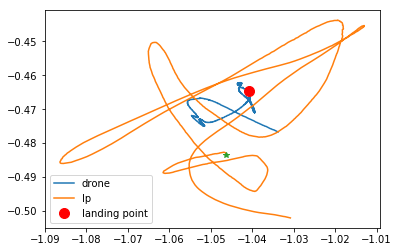

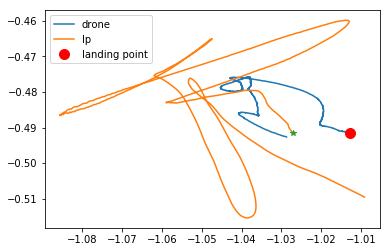

In [40]:
land_errors = []
for cf_name in cf_names:
    for folder_name in os.listdir(path):
    #     print path+folder_name
        try:
            land_errors.append( one_drone_land(path+folder_name+'/', cf_name) )
            print 
        except:
            pass

In [45]:
print np.mean(land_errors), np.std(land_errors) ,np.max(land_errors)

0.02899167451805656 0.014098639837329488 0.05705442775990614
